In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# BROCK CODING STARTING HERE

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
results = session.query(Measurement).first()

results.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2ba2c532a48>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0}

In [54]:
results = session.query(Station).first()

results.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2ba2cf71948>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

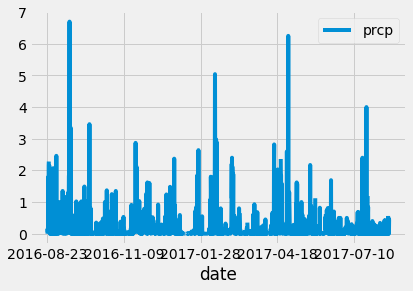

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# -----------------------------------------------------------------------------------------------------------
# Used a query to reveal the latest date in the data set and used that date to calculate date a year ago.
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).limit(1).all()
max_date
# Max date is '2017-08-23'
# -----------------------------------------------------------------------------------------------------------

# Perform a query to retrieve the data and precipitation scores

# -----------------------------------------------------------------------------------------------------------
# Based on previous query, determined I need to exclude all dates before '2016-08-23'.
past_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-22').\
order_by(Measurement.date).all()
past_year
# -----------------------------------------------------------------------------------------------------------

# Save the query results as a Pandas DataFrame and set the index to the date column

# -----------------------------------------------------------------------------------------------------------
past_year_df = pd.DataFrame(past_year)
past_year_df = past_year_df.set_index(past_year_df['date'])
past_year_df = past_year_df.drop(columns=['date'])
past_year_df
# -----------------------------------------------------------------------------------------------------------

# Use Pandas Plotting with Matplotlib to plot the data

# -----------------------------------------------------------------------------------------------------------
past_year_df.plot.line()
# -----------------------------------------------------------------------------------------------------------
# REMEMBER TO FORMAT CHART...

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
past_year_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [42]:
# Design a query to show how many stations are available in this dataset?

# -----------------------------------------------------------------------------------------------------------
unique_stations = session.query(Measurement.station).distinct(Measurement.station).\
filter(Measurement.date > '2016-08-22').count()

unique_stations
# -----------------------------------------------------------------------------------------------------------

7

In [33]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# -----------------------------------------------------------------------------------------------------------
station_count = session.query(Measurement.station, func.count(Measurement.date)).\
group_by(Measurement.station).filter(Measurement.date > '2016-08-22').\
order_by(func.count(Measurement.date).desc()).all()

station_count
# -----------------------------------------------------------------------------------------------------------

[('USC00519397', 361),
 ('USC00519281', 352),
 ('USC00516128', 349),
 ('USC00513117', 343),
 ('USC00519523', 337),
 ('USC00514830', 305),
 ('USC00517948', 183)]

In [49]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# -----------------------------------------------------------------------------------------------------------
most_active_station_stats = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),\
                                          func.avg(Measurement.tobs)).\
filter(Measurement.date > '2016-08-22').filter(Measurement.station.like('USC00519397')).all()

most_active_station_stats
# -----------------------------------------------------------------------------------------------------------

[(60.0, 87.0, 75.21052631578948)]

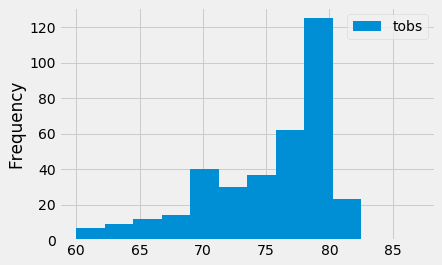

In [53]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# -----------------------------------------------------------------------------------------------------------
# Based on previous query, determined I need to exclude all dates before '2016-08-23'.
mas_12mo_temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > '2016-08-22').\
filter(Measurement.station.like('USC00519397')).order_by(Measurement.date).all()
mas_12mo_temp
# -----------------------------------------------------------------------------------------------------------

# Save the query results as a Pandas DataFrame and set the index to the date column

# -----------------------------------------------------------------------------------------------------------
mas_12mo_temp_df = pd.DataFrame(mas_12mo_temp)
mas_12mo_temp_df = mas_12mo_temp_df.set_index(mas_12mo_temp_df['date'])
mas_12mo_temp_df = mas_12mo_temp_df.drop(columns=['date'])
mas_12mo_temp_df
# -----------------------------------------------------------------------------------------------------------

# Use Pandas Plotting with Matplotlib to plot the data

# -----------------------------------------------------------------------------------------------------------
mas_12mo_temp_df.plot.hist(bins=12)
# -----------------------------------------------------------------------------------------------------------
# REMEMBER TO FORMAT CHART...

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
